# D212 - OFM3 TASK 3: ASSOCIATION RULES AND LIFT ANALYSIS

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=88f32cbb-10ec-406c-b734-ad4c009c3d2e" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=88f32cbb-10ec-406c-b734-ad4c009c3d2e

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Exploring the Data

#### Importing Libraries:

In [1]:
#importing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
## !!! Trying to Display a full Dataframe may cause a problem.
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#Reading the Data file (As received) teleco_market_basket.csv
df_raw= pd.read_csv('teleco_market_basket.csv')
df_raw.shape

(15002, 20)

In [3]:
df_raw.head(10)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking for empty columns. 
df_raw.isnull().all(axis=0).sum() #No. of empty columns. 

0

In [5]:
#checking for empty Rows.
df_raw.isnull().all(axis=1).sum() #No. of empty rows. 

7501

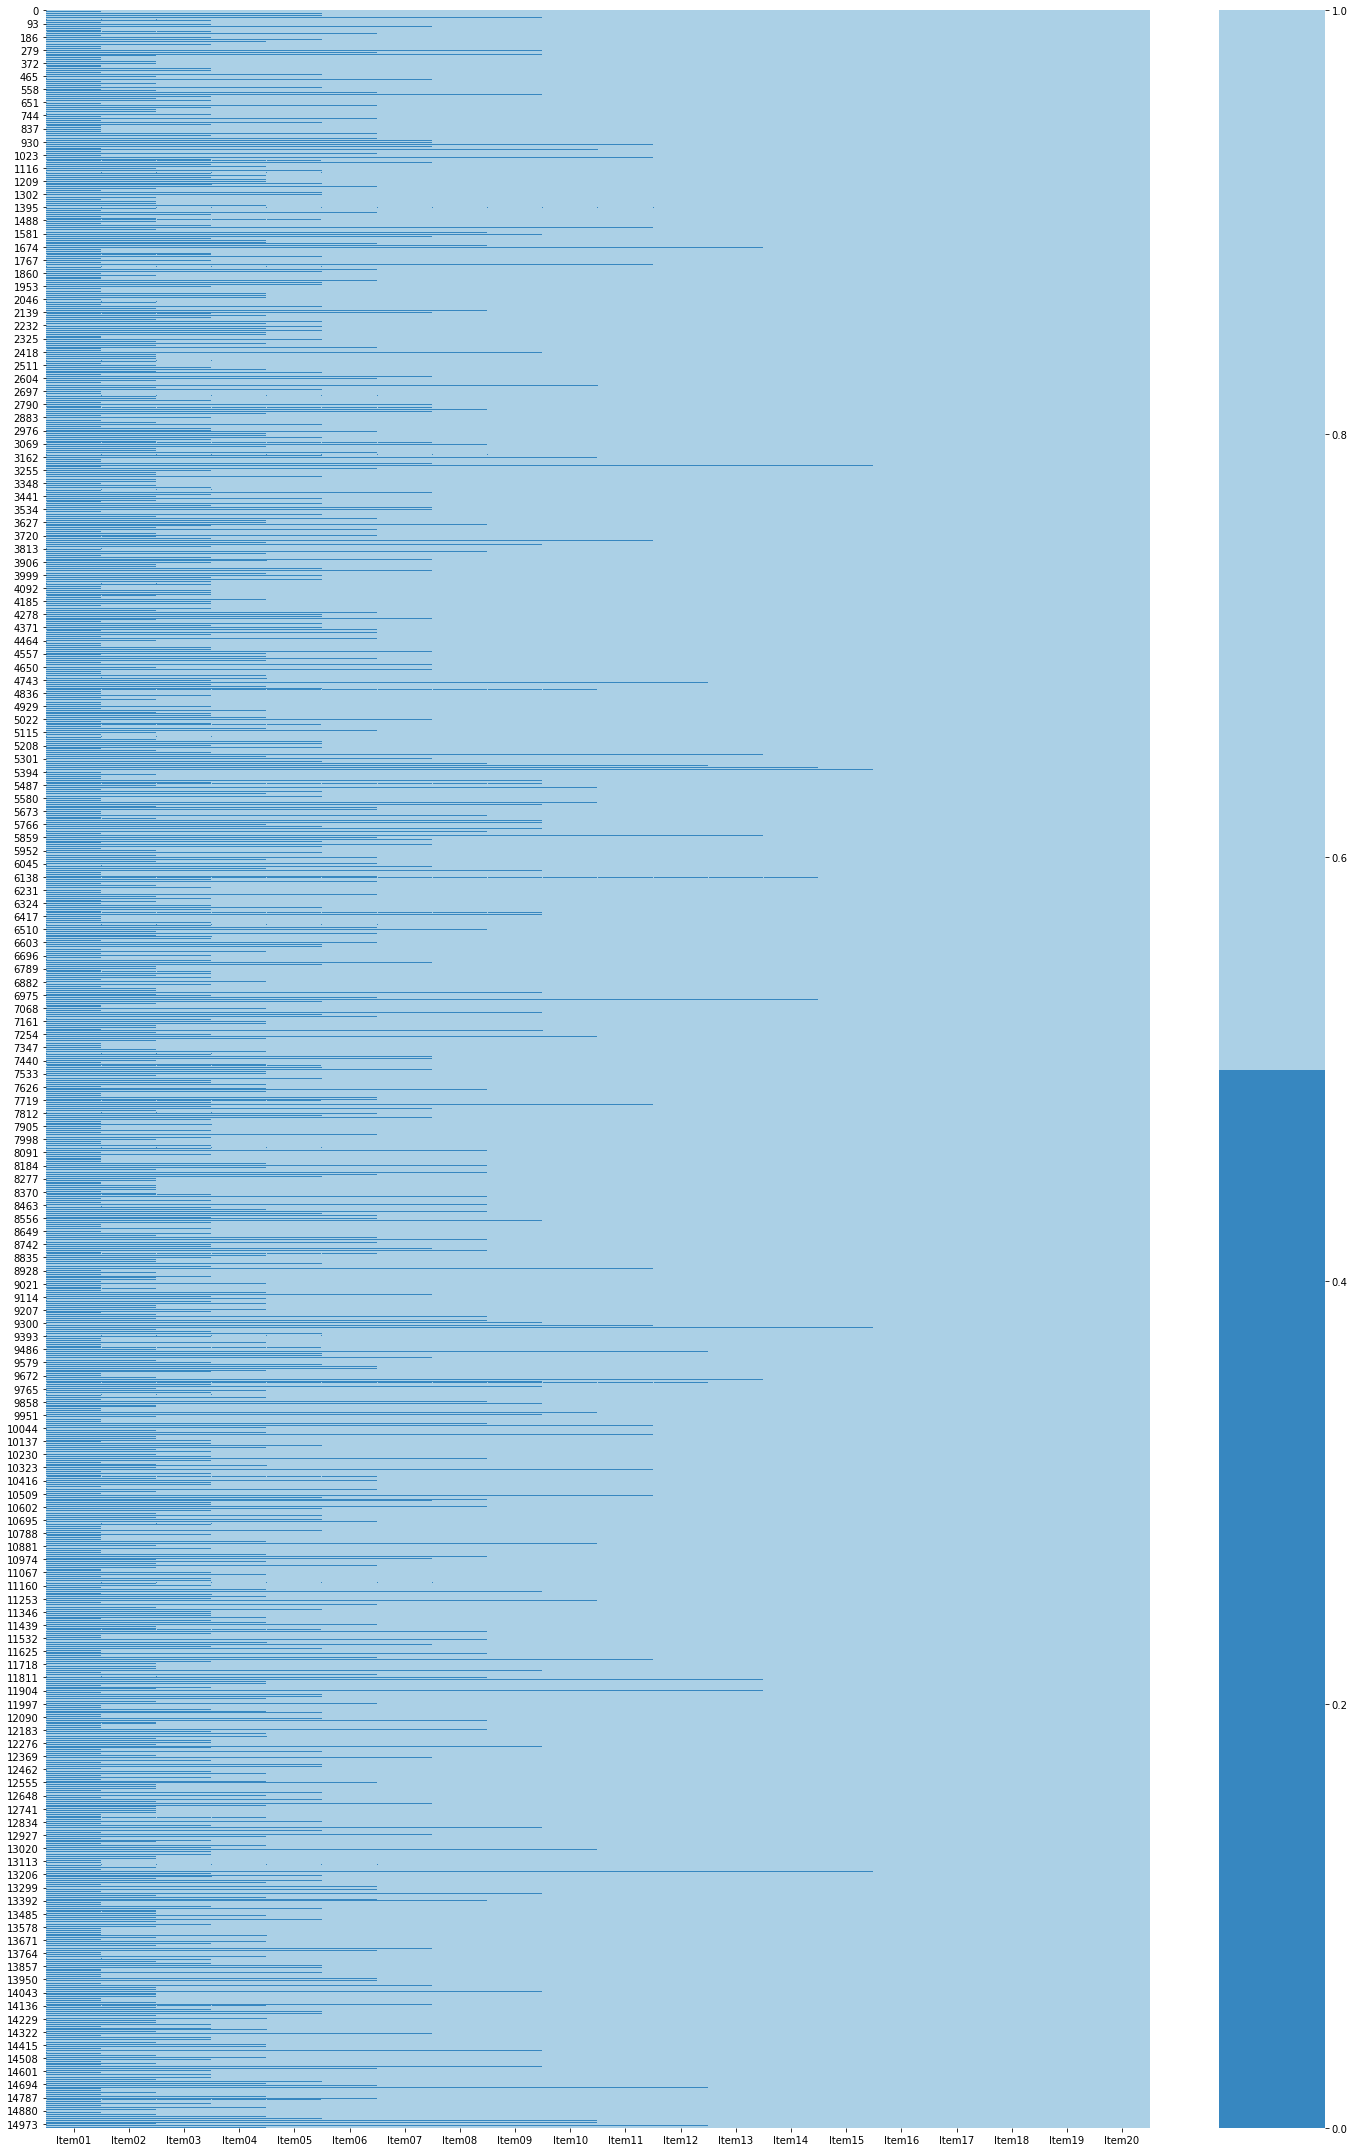

In [6]:
plt.figure(figsize=(20,30))
cmap1=sns.color_palette("Blues_r",2)
sns.heatmap(df_raw.isnull(),cmap=cmap1)
plt.tight_layout()
plt.show()

In [7]:
# Dropping empty rows.
df_raw.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
df_raw.shape

(7501, 20)

#### Data info:

In [8]:
df_raw.info() #Data Information of the Raw DataFrame (As received)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.2+ MB


#### Summary statistics:

In [9]:
df_raw.describe().T

,count,unique,top,freq
Item01,7501,115,Dust-Off Compressed Gas 2 pack,577
Item02,5747,117,Dust-Off Compressed Gas 2 pack,484
Item03,4389,115,Dust-Off Compressed Gas 2 pack,375
Item04,3345,114,Dust-Off Compressed Gas 2 pack,201
Item05,2529,110,Apple USB-C Charger cable,153
Item06,1864,106,USB 2.0 Printer cable,107
Item07,1369,102,Apple USB-C Charger cable,96
Item08,981,97,Apple USB-C Charger cable,67
Item09,654,88,Apple USB-C Charger cable,57
Item10,395,80,Apple USB-C Charger cable,31


###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Part I: Research Question

##### A.  Describe the purpose of this data mining report by doing the following:

##### 1.  Propose one question relevant to a real-world organizational situation that you will answer using market basket analysis.

When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term. (WGU,2021).

The company wants to better understand the characteristics of its customers. By identifying key associations of customers’ purchases, ultimately allowing better business and strategic decision-making.

A question to be asked is,  can Market Basket Analysis be used to mine transaction data and find purchase patterns, and find the items association rules representing what items are more likely to be bought together?

##### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
 


The goal of the data analysis is to use Market Basket Analysis to mine transaction data and find purchase patterns, and the items association rules that can give stakeholders an idea about what items are more likely to be bought together and how to utilize those findings.

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Part II: Market Basket Justification

##### ##### B.  Explain the reasons for using market basket analysis by doing the following:

##### 1.  Explain how market basket analyzes the selected dataset. Include expected outcomes.

market basket analysis is an unsupervised learning technique that basically helps to mine transaction data and find purchase patterns, based on association analysis (Moffitt,2017).

market Basket Analysis takes data at the transaction level, which lists all items bought by a customer in a single purchase. The technique determines relationships of what products were purchased with which other product(s). These relationships are then used to build profiles containing If-Then rules of the items purchased, Then we need to assess the strength of the rules that implies the associations between those items. different metrics to be used for the assessment, the rules or associations that don’t meet a preset threshold would be discarded “pruned”. The association rules that remain should have a high level of interestingness (Sivek,2020)

Then these relationships or rules are evaluated using standard metrics in order to determine which rules are more profitable and beneficial (Saygın,2020).

##### 2.  Provide one example of transactions in the dataset.

In [10]:
print('Transaction no. 1 (20 items) \n')
display(df_raw.head(1))

Transaction no. 1 (20 items) 



,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses


##### 3.  Summarize one assumption of market basket analysis.
 

Association rules do not imply causal relationships, but the frequency of co-occurrence in recorded purchases (Sivek,2020) and a subset of a frequent item-set supposed to be a frequent item-set. (Kmair,2019)

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Part III: Data Preparation and Analysis

##### C.  Prepare and perform market basket analysis by doing the following:

##### 1.  Transform the dataset to make it suitable for market basket analysis. Include a copy of the cleaned dataset.

In [11]:
#Converting the data frame into a list of lists  - (Kmair,2019)
records = []
for i in range (0, 7501):
    records.append([str(df_raw.values[i,j]) for j in range(0, 20)])

In [12]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)

#building the data frame rows are logical and columns are the items have been purchased  - (Kmair,2019)
transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,HooToo USB C Hub,HyperX Cloud Stinger Headset,Jelly Comb 2.4G Slim Wireless mouse,Leader Desk Pad Protector,Logitech M510 Wireless mouse,Logitech MK270 Wireless Keyboard/Mouse,Logitech MK345 Wireless combo,Logitech USB H390 headset,M.2 Screw kit,Mfi-Certified Lightning to USB A Cable,Micro Center 32GB Memory card,Microsot Surface Dock 2,Moread HDMI to VGA Adapter,Mpow HC6 USB Headset,NETGEAR CM500 Cable Modem,NETGEAR Nighthawk WiFi Router,NETGEAR Orbi Home Mesh WiFi System,Nylon Braided Lightning to USB cable,PS4 Headset,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [13]:
#drop nan column - (Kmair,2019)
basket_clean = transf_df.drop(['nan'], axis = 1)
basket_clean.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,HooToo USB C Hub,HyperX Cloud Stinger Headset,Jelly Comb 2.4G Slim Wireless mouse,Leader Desk Pad Protector,Logitech M510 Wireless mouse,Logitech MK270 Wireless Keyboard/Mouse,Logitech MK345 Wireless combo,Logitech USB H390 headset,M.2 Screw kit,Mfi-Certified Lightning to USB A Cable,Micro Center 32GB Memory card,Microsot Surface Dock 2,Moread HDMI to VGA Adapter,Mpow HC6 USB Headset,NETGEAR CM500 Cable Modem,NETGEAR Nighthawk WiFi Router,NETGEAR Orbi Home Mesh WiFi System,Nylon Braided Lightning to USB cable,PS4 Headset,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [14]:
# Saving a copy of the prepared data set.
D212_t3_input=basket_clean.copy()
D212_t3_input.to_csv('D212_T3_market_basket_analysis_input.csv', index = True)

##### 2.  Execute the code used to generate association rules with the Apriori algorithm. Provide screenshots that demonstrate the error-free functionality of the code.

In [15]:
frequent_itemsets = apriori(basket_clean, min_support = 0.04, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
frequent_itemsets.head()

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.068391,(Anker USB C to HDMI Adapter)
3,0.087188,(Apple Lightning to Digital AV Adapter)
4,0.179709,(Apple Pencil)


##### 3.  Provide values for the support, lift, and confidence of the association rules table.

In [16]:
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
3,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
8,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


##### 4.  Identify the top three rules generated by the Apriori algorithm. Include a screenshot of the top rules along with their summaries.
 

In [17]:
rules.sort_values(by='confidence',ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
8,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Part IV: Data Summary and Implications

##### D.  Summarize your data analysis by doing the following:

##### 1.  Summarize the significance of support, lift, and confidence from the results of the analysis.

* Support is the relative frequency that the rules show up, emphasizes how popular the combination of the itemset is, at 0.04 minimum support, the apriori algorithm has been used to try only the combinations of items that bought together more than 4 % out of all analyzed transactions.


* Lift is the ratio of the observed support to that expected if the two rules were independent, thus no inferences can be made about an item when the other is purchased.  A lift of 1.75 for the first top rule implies that (Dust-Off Compressed Gas 2 pack)  is 1.75 times more likely to be bought by the customer who also buys (SanDisk Ultra 64GB card).


* Confidence is a measure of the reliability of the rule, denotes the likelihood of certain items are purchased together, the first top rule from the results showed 0.42 confidence which represents the probability of the first top rule (SanDisk Ultra 64GB card) and (Dust-Off Compressed Gas 2 pack).

##### 2.  Discuss the practical significance of the findings from the analysis.

The result of the first top rule can be interpreted as following :

* The support is 0.04 calculated by dividing the number of transactions containing (SanDisk Ultra 64GB card) and (Dust-Off Compressed Gas 2 pack)  by the total number of transactions.


* The confidence level is 0.42 shows that out of all the transactions that contain (SanDisk Ultra 64GB card) 0.42 contain (Dust-Off Compressed Gas 2 pack)  as well.


* The lift 1.74 tells us that (Dust-Off Compressed Gas 2 pack)  is 1.74 times more likely to be bought by the customer who also buys (SanDisk Ultra 64GB card).


##### 3.  Recommend a course of action for the real-world organizational situation from part A1 based on your results from part D1.
 

By applying the Apriori algorithm and association rules we can have a better insight into what items are more likely to be bought together.

A specific item (Dust-Off Compressed Gas 2 pack) appeared as a consequent in the top three rules resulted from the analysis, this item can be upsold by increasing its availability in stores or on the website.

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Part V: Attachments

##### E.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=88f32cbb-10ec-406c-b734-ad4c009c3d2e" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=88f32cbb-10ec-406c-b734-ad4c009c3d2e

##### F.  Record all web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.
 

##### G.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 

##### H.  Demonstrate professional communication in the content and presentation of your submission.

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### References:

* WGU. D212 Data Mining II  (2021, June 18), Data Files and Associated Dictionary Files.
https://access.wgu.edu/ASP3/aap/content/gkridh34kd85jf94dcj2.zip


* WGU. D212 Data Mining II  (2021, June 18), TASK 3: ASSOCIATION RULES AND LIFT ANALYSIS.
https://tasks.wgu.edu/student/001410986/course/23200006/task/3109/overview


* Eser Saygın.(2020) Affinity Analysis (Market Basket Analysis).
https://towardsdatascience.com/affinity-analysis-market-basket-analysis-c8e7fcc61a21#:~:text=%20Affinity%20Analysis%20%28Market%20Basket%20Analysis%29%20%201,important%20metric%20in...%205%20Conviction.%20%20More%20

* Susan Currie Sivek. (2020) Market Basket Analysis 101: Key Concepts
https://towardsdatascience.com/market-basket-analysis-101-key-concepts-1ddc6876cd00


* Chris Moffitt. (2017) Introduction to Market Basket Analysis in Python.
https://pbpython.com/market-basket-analysis.html


* Explanation of the Market Basket Model
https://webfocusinfocenter.informationbuilders.com/wfappent/TLs/TL_rstat/source/marketbasket49.htm


* Isaiah Hull. (No Date) Market Basket Analysis in Python, Datacamp. 
https://learn.datacamp.com/courses/market-basket-analysis-in-python


* Sara kmair.(2019) Market Basket Analysis.
https://medium.com/@sarahkmair7/market-basket-analysis-8dc699b7e27


* DEVOPEDIA. (No Date) Market Basket Analysis
https://devopedia.org/market-basket-analysis


* (datacamp) Data Mining II – D212 course materials and Labs
https://learn.datacamp.com/custom-tracks/custom-data-mining-ii


* General Questions/Answers from https://stackoverflow.com/


* Documentation of Python packages: pandas, matplotlib,numpy and mlxtend
